# 8.3 Confirmatory Multidimensional IRT

In this section, we illustrate how MIRT models can be fitted in a confirmatory way.
As in CFA, we assign items to load on a particular dimension. We use once more
the *polytomous* ASTI dataset and assign the items to the following five
factors, based on the underlying ASTI theory: self-knowledge and integration (**si**),
peace of mind (**pm**), non-attachment (**na**), self-transcendence (**st**), and presence
in the here-and-now and growth (pg), as described in Koller et al. (2017). We fit a
multidimensional GRM (5 dimensions).

## Fit the model

Note that the `mirt` model specification syntax is a bit different from `lavaan`.
Below we specify the item assignments to the factors and the corresponding
covariance structure of the latent variables (we allow for a full correlation pattern).  

Load and inspect the `ASTI` dataset. Next, extract a subset that contains all rows but only the first 25 (1:25) columns of `ASTI`. Name the subset `itasti`.  

The model has already been specified for you. You only need to fit it. To do that, use the `mirt` function, providing the following inputs: the `data` (`itasti`), the `model` (`modASTI`), the `itemtype` (you can leave the other inputs as they are). As we use *polytomous* data we have to set the this argument to `graded`.

In [ ]:
ro.r('data("ASTI")')
# Convert to Python
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Eliminate first item (misfit)
itasti = ASTI.loc[:, ASTI.columns[:25]]
print(itasti.head())

# Put data into R
ro.globalenv['itasti'] = itasti

# Specifiy the model
ro.r('modASTI <- "'
      'si = 10,19,20,21\n'
      'pm = 1,5,9,22\n'
      'na = 3,6,8,12\n'
      'st = 2,4,7,13,16,24,25\n'
      'pg = 11,14,15,17,18,23\n'
      'COV = si*pm*na*st*pg"')

#fit the model
ro.r("asti5d <- mirt(itasti, model = modASTI, itemtype = 'graded', method = 'MHRM', SE.type = 'MHRM', verbose = FALSE)")

   ASTI1  ASTI2  ASTI3  ASTI4  ASTI5  ASTI6  ASTI7  ASTI8  ASTI9  ASTI10  ...  \
1    1.0    2.0    2.0    3.0    3.0    1.0    2.0    1.0    3.0     2.0  ...   
2    2.0    2.0    3.0    2.0    3.0    1.0    2.0    1.0    3.0     2.0  ...   
3    1.0    1.0    0.0    1.0    2.0    1.0    0.0    2.0    2.0     1.0  ...   
4    1.0    2.0    2.0    3.0    1.0    2.0    2.0    2.0    1.0     1.0  ...   
5    2.0    3.0    2.0    3.0    1.0    1.0    3.0    1.0    3.0     1.0  ...   

   ASTI16  ASTI17  ASTI18  ASTI19  ASTI20  ASTI21  ASTI22  ASTI23  ASTI24  \
1     3.0     0.0     1.0     1.0     0.0     1.0     1.0     2.0     0.0   
2     2.0     2.0     2.0     1.0     2.0     1.0     1.0     1.0     1.0   
3     1.0     2.0     2.0     2.0     1.0     0.0     2.0     2.0     1.0   
4     3.0     0.0     3.0     2.0     1.0     1.0     1.0     2.0     0.0   
5     3.0     1.0     2.0     2.0     0.0     0.0     2.0     2.0     1.0   

   ASTI25  
1     2.0  
2     1.0  
3     2.0  
4 

Compared to the 2D-2PL from above, here we use a different estimation
algorithm which is suggested to employ for higher-dimensional models.
First, we print out correlation matrix of the trait dimensions. Second, from the
loadings in `astisum$rotF`, we see that item 18 (“I often lose myself in what I
am doing”) has a very small loading on the personal growth dimension and could
therefore be subject to elimination.
To show this, we run the following code chunk.

## Inspect the model

In [ ]:
ro.r("astisum <- summary(asti5d, verbose = FALSE)")
print(ro.r("round(astisum$fcor, 3)")) # Correlation matrix

print(ro.r('round(astisum$rotF["ASTI18",], 4)')) # Loadings of item ASTI18

[[1.    0.712 0.232 0.122 0.838]
 [0.712 1.    0.547 0.166 0.77 ]
 [0.232 0.547 1.    0.139 0.196]
 [0.122 0.166 0.139 1.    0.336]
 [0.838 0.77  0.196 0.336 1.   ]]
[ 0.      0.      0.      0.     -0.0074]


## Inspect model fit

Again, let us compute the M2 statistic, including the CFA/SEM fit indices.
Run the following code chunk.

In [ ]:
print(ro.r("M2(asti5d, QMC = TRUE)"))

Exception ignored from cffi callback <function _processevents at 0x79cec146d620>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 283, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
    
KeyboardInterrupt: 


            M2  df p      RMSEA    RMSEA_5   RMSEA_95      SRMSR       TLI
stats 907.4895 228 0 0.05140074 0.04789892 0.05490454 0.06055476 0.8187901
            CFI
stats 0.8429055



The global fit indices and model test suggest a poor model fit.  

For such complex scenarios, an exploratory version of the model with oblique
rotation would give us the possibility to explore in more detail what is going
on. Another good strategy, before even considering fitting a confirmatory MIRT
model, is to compute unidimensional models for each subscale individually and
eliminate misfitting items already at that level. The items kept in the model can be
subsequently subject to a higher-dimensional IRT fit.

## End of todays session

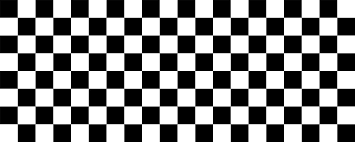 \

Congrats! You have now finished the RMD on Multidimensional IRT. If you have any question that we did not cover in class, feel free to either post it on the forum section or to come to our open office ours on Wednesday 10-11 a.m. and/or Friday 01-02 p.m.